In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [311]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

data=pd.read_csv(url)

In [312]:
df=pd.DataFrame(data)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [313]:
# SLR
lm=LinearRegression()
lm

LinearRegression()

In [314]:
x=df[["highway-mpg"]]
y=df[["price"]]

In [315]:
lm.fit(x,y)
yhat=lm.predict(x)

In [316]:
yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [317]:
lm.intercept_

array([38423.30585816])

In [318]:
lm.coef_

array([[-821.73337832]])

In [319]:
# Modelo --> price = 38423.31 - 821.73 * higway-mpg

In [320]:
lm1=LinearRegression()
lm1

LinearRegression()

In [321]:
x=df[["engine-size"]]
y=df[["price"]]

In [322]:
lm1.fit(x,y)
yhat1=lm1.predict(x)
yhat1[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [323]:
lm1.coef_

array([[166.86001569]])

In [324]:
lm1.intercept_

array([-7963.33890628])

In [325]:
# MLR
z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y=df[["price"]]

In [326]:
lm.fit(z,y)
yhat=lm.predict(z)

In [327]:
yhat[0:5]

array([[13699.11161184],
       [13699.11161184],
       [19051.65470233],
       [10620.36193015],
       [15521.31420211]])

In [328]:
lm.intercept_

array([-15806.62462633])

In [329]:
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [330]:
lm2=LinearRegression()

In [331]:
z=df[["normalized-losses","highway-mpg"]]
y=df[["price"]]

In [332]:
lm2.fit(z,y)
yhat=lm2.predict(z)
yhat[0:5]

array([[16231.78938339],
       [16231.78938339],
       [17052.24372355],
       [13833.33798916],
       [20396.97271047]])

In [333]:
lm2.coef_

array([[   1.49789586, -820.45434016]])

In [334]:
lm2.intercept_

array([38201.31327246])

(0.0, 48173.14190374806)

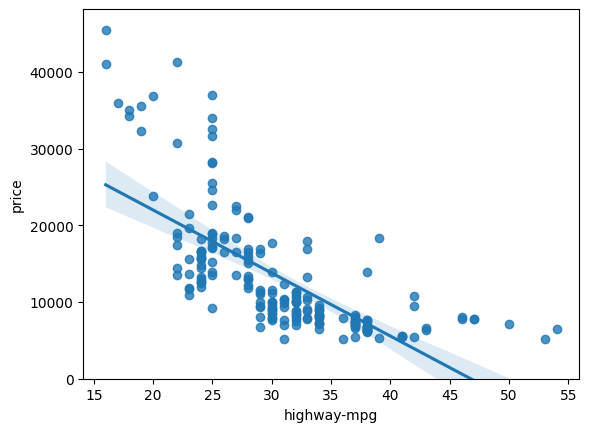

In [335]:
# Avaliação de modelos SLR com gráficos


sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

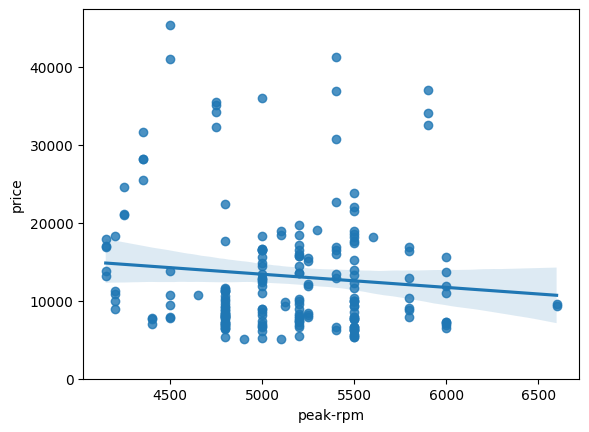

In [336]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [337]:
print(df[["highway-mpg","peak-rpm","price"]].corr())

             highway-mpg  peak-rpm     price
highway-mpg     1.000000 -0.058598 -0.704692
peak-rpm       -0.058598  1.000000 -0.101616
price          -0.704692 -0.101616  1.000000


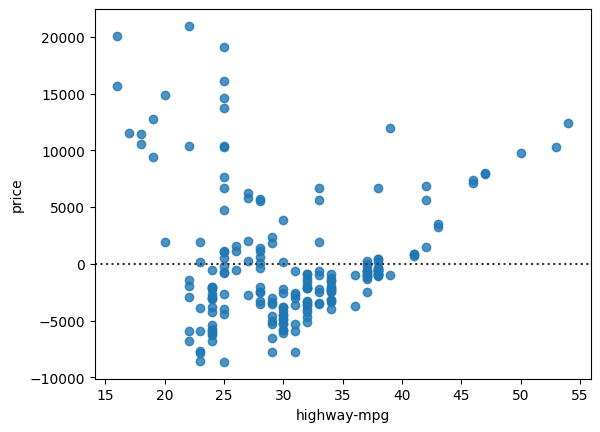

In [338]:
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

Text(0, 0.5, 'Proportion of Cars')

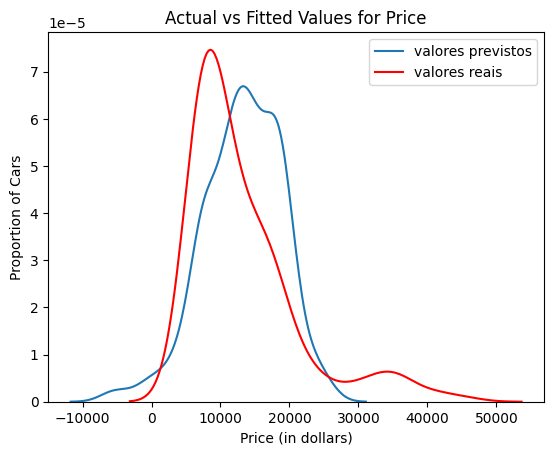

In [339]:
# Avaliação de modelos MLR

sns.kdeplot(yhat,label="valores previstos")
sns.kdeplot(df["price"],color="r",label="valores reais")
plt.legend() # apresenta label no gráfico

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

In [340]:
def PlotPolly(model, independent_variable, dependent_variabble, Name): # passa parametros
    x_new = np.linspace(15, 55, 100) # cria array de com 100 valores igualmente espaçados entre 15 e 55.

    y_new = model(x_new) # cria 100 valores a partir do polinomio trocando o x pelos valores de cima

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-') # 1ºs 3 parametros marcam valores observados com pontos, parametros seguintes traçam o polinomio que é o modelo ajustado
    
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [341]:
x = df['highway-mpg']
y = df['price']

In [342]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


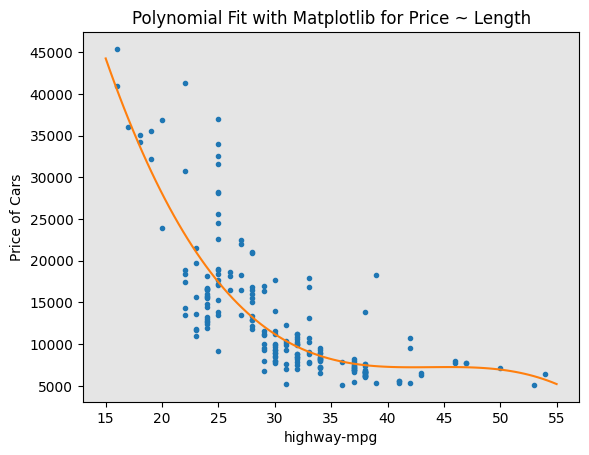

In [343]:
PlotPolly(p, x, y, 'highway-mpg')

In [344]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [345]:
f=np.polyfit(x,y,11)
p=np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


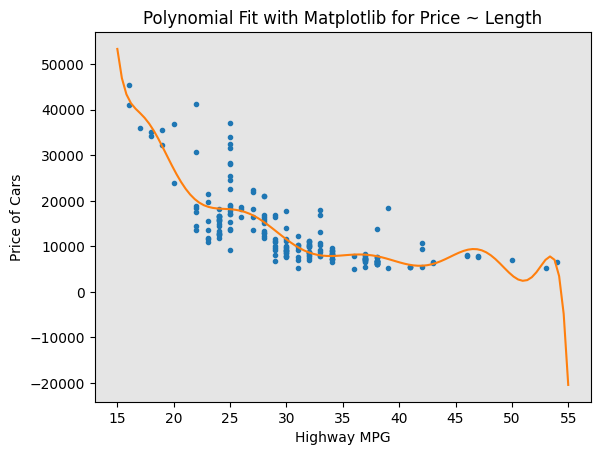

In [346]:
PlotPolly(p,x,y,"Highway MPG")

In [347]:
from sklearn.preprocessing import PolynomialFeatures

In [348]:
pr=PolynomialFeatures(degree=2) # Cria objeto que gera caracteristicas até ao 2º grau de um Polynomial Fit com mais de 1 var. independente
pr

PolynomialFeatures()

In [349]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z_pr=pr.fit_transform(Z) # Gera novas caracteristicas polinomiais entre as variaveis

In [350]:
Z.shape

(201, 4)

In [351]:
Z_pr.shape # gera 15 colunas(1(interseção,valor^0),a,b,c,d,a^2,b^2,c^2,d^2,ab,ac,ad,bc,bd,cd)

(201, 15)

In [352]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # padroniza colunas, colocando todas com media 0 e desvio padrão 1

In [353]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [354]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [355]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [356]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [357]:
Input=[("scale",StandardScaler()),("model",LinearRegression())]

In [358]:
pipeline2=Pipeline(steps=Input)

In [359]:
pipeline2.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [360]:
ypipe2=pipeline2.predict(Z)
ypipe2[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [361]:
lm3=LinearRegression()
x=df[["highway-mpg"]]
y=df[["price"]]

In [362]:
lm3.fit(x,y)
print("R square =",lm3.score(x,y))

R square = 0.4965911884339176


In [363]:
from sklearn.metrics import mean_squared_error as mse
yhat=lm3.predict(x)
print("MSE=",mse(y,yhat))

MSE= 31635042.944639888


In [364]:
lm4=LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm4.fit(Z,y)
print("R square=",lm4.score(Z,y))

R square= 0.8093562806577457


In [365]:
yhat=lm4.predict(Z)
print("MSE=",mse(y,yhat))

MSE= 11980366.87072649


In [366]:
from sklearn.metrics import r2_score
x = df['highway-mpg']
r_square=r2_score(y,p(x))
print("R square=",r_square)

R square= 0.702376909204032


In [367]:
mse(df['price'], p(x))

18703127.64164033

In [368]:
new_input=np.arange(1,100,1).reshape(-1,1)
new_input

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [369]:
lm6=LinearRegression()
X = df[['highway-mpg']]
Y = df[['price']]
lm6.fit(X,Y)

LinearRegression()

In [370]:
yhat=lm6.predict(new_input)
yhat[0:5]

c:\Users\Ricardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

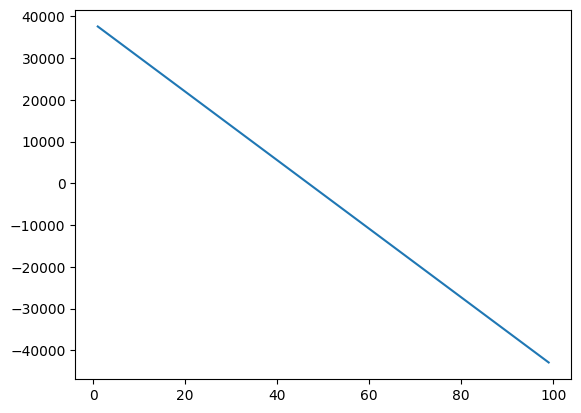

In [371]:
plt.plot(new_input,yhat)

In [372]:
# Podemos verificar que o maior R^2 é o do MLR e o menor MSE também é o do MLR, logo esse será o modelo melhor ajustado